In [1]:
import sys
sys.path.append('../')

import os

import cqt
import cqt.env.mkt_env as env 
import cqt.env.mkt_env_spot as envspot
import cqt.ledger.ledger as ledger
import cqt.datagen as dg
import cqt.dbutility.dbutility as db
import cqt.strats.strategy as stg
import cqt.strats.strategy_long_short_average as stg_ls
import pandas as pd
import pickle

from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import copy
#import cqt.strats.StrategyTensorFlow as stg_tf

In [ ]:
data = pd.read_csv('../data/webdata/Gemini_BTCUSD_d.csv',skiprows=1)


data.rename(columns={'Open': 'price_open', 'High': 'price_high', 'Low': 'price_low', 'Close': 'price_close', 'Volume BTC':'volume_traded','Date':'time_close'},inplace=True)


df_btc=dg.IndexedData("","",data)
#df_eth = db.get_from_db("coinapi-ohlcv-COINBASE_SPOT_ETH_USD-1DAY",from_date='2016-01-01',to_date=TODAY.strftime('%Y-%M-%d'))
#df_btc.data


#df_btc.data = data


In [5]:
config = {'asset_type': 'spot'}
model_btc_eth = env.MktEnv([])
comp_btc = envspot.MktEnvSpot('btc', df_btc, config)
comp_btc.data=comp_btc.data.sort_index()
model_btc_eth.insert_section(comp_btc)



cash = 10000
assets = {'btc': 0}
ini_pfo = ledger.Ledger(assets, cash)


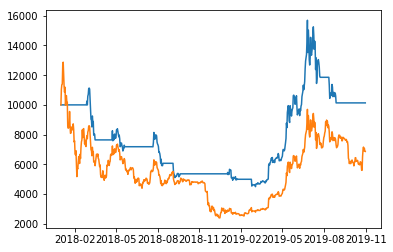

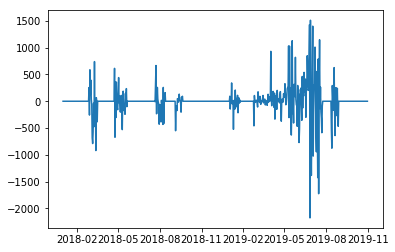

In [40]:
ls_rule = {'method' : 'moving_average', 'window_size' : [15, 30], 'tolerance_up' : 0.03, 'tolerance_down' : 0.03}
strats = stg_ls.StrategyInverseMA(model_btc_eth, ini_pfo, ls_rule)
start_date_str = '2018-01-01'
end_date_str='2019-11-01'
start_date = datetime.strptime(start_date_str, '%Y-%m-%d')
end_date=datetime.strptime(end_date_str, '%Y-%m-%d')
report = strats.back_testing(start_date ,end_date)

longShortReport = report.copy()

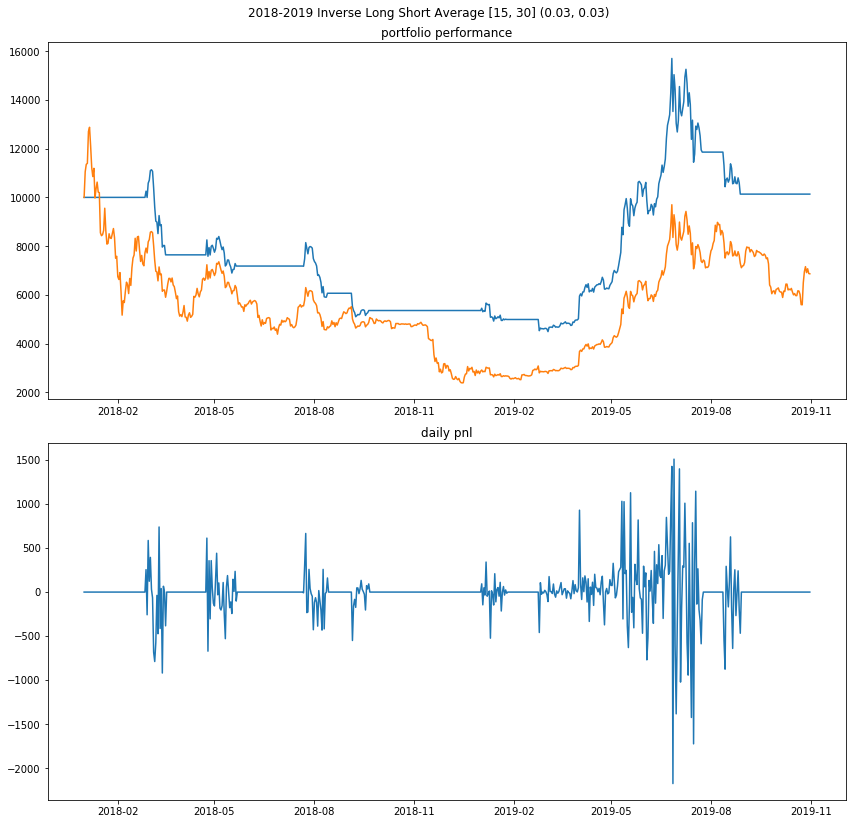

max daily gain: 1510.4160184877455
max daily loss: -2175.7636805971615


In [41]:
report = longShortReport
outDir='./'

strategyName = '2018-2019 Inverse Long Short Average [15, 30] (0.03, 0.03)'
report.to_csv(os.path.join(outDir, strategyName+'.csv'), index=False)
fig_width = 12
fig_height = 12
fig, ax0 = plt.subplots(2,1, figsize=(fig_width,fig_height))
ax0[0].plot(report['date'], report['total'])
ax0[0].plot(report['date'], report['btc_price'] * cash / report['btc_price'][0])
ax0[0].set_title('portfolio performance')
ax0[1].plot(report['date'], report['pnl'])
ax0[1].set_title('daily pnl')
fig.suptitle(strategyName)
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
fig.savefig(os.path.join(outDir, strategyName+'.pdf'))
plt.show()

print('max daily gain:', report['pnl'].max())
print('max daily loss:', report['pnl'].min())


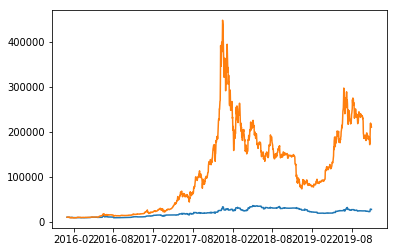

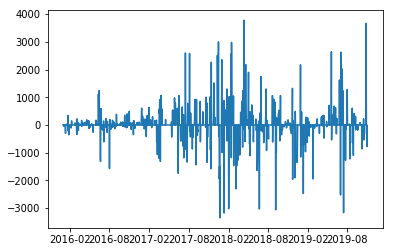

In [31]:
import cqt.strats.strategy_double_dip as stg_dd

# Double Dip Strategy
dd_rule = {'method' : 'moving_average', 'window_size' : [3, 5], 'tolerance_up' : 0.03, 'tolerance_down' : 0.03}
strats = stg_dd.StrategyDoubleDip(model_btc_eth, ini_pfo, dd_rule)
report = strats.back_testing(start_date ,end_date)


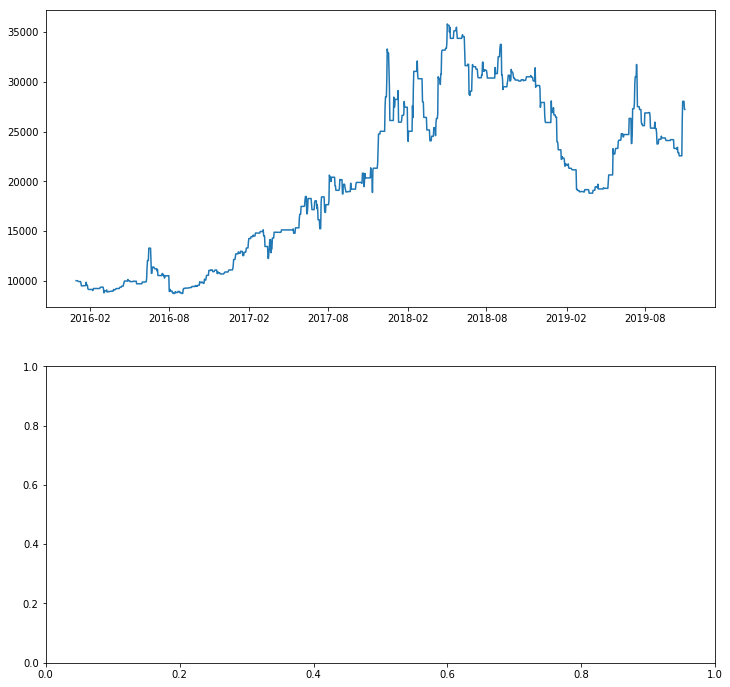

In [38]:
strategyName = '2016-2019 Double Tops Bottoms [3, 5] (0.03, 0.03)'
report.to_csv(os.path.join(outDir, strategyName+'.csv'), index=False)
fig_width = 12
fig_height = 12
fig, ax0 = plt.subplots(2,1, figsize=(fig_width,fig_height))
ax0[0].plot(report['date'], report['total'])

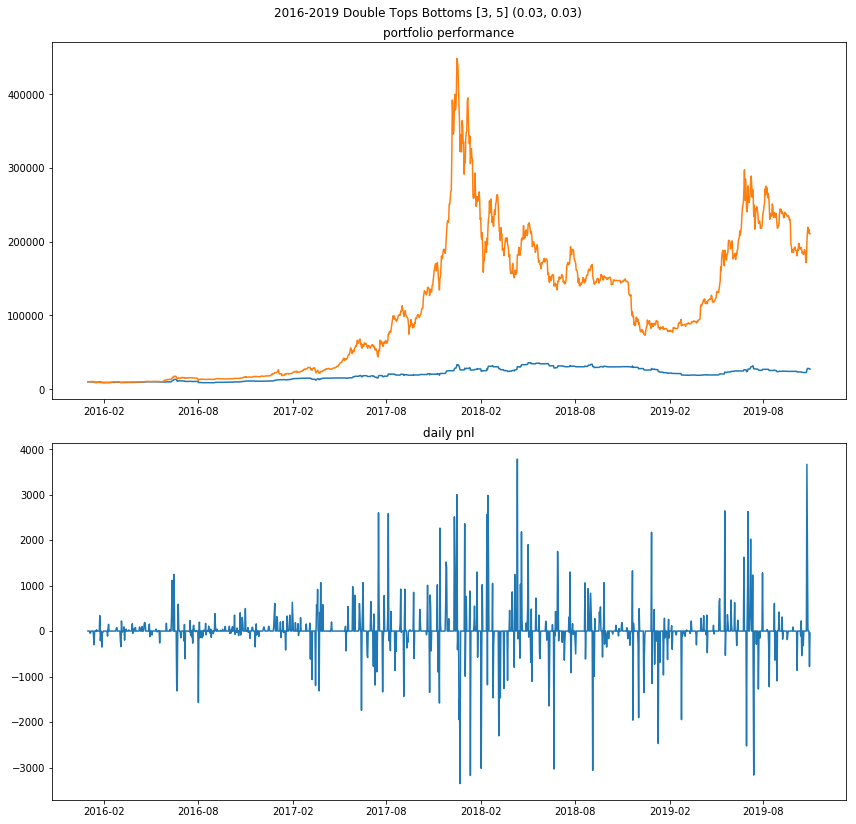

max daily gain: 3779.2583166608565
max daily loss: -3353.079156921209


In [32]:
ax0[0].plot(report['date'], report['btc_price'] * cash / report['btc_price'][0])
ax0[0].set_title('portfolio performance')
ax0[1].plot(report['date'], report['pnl'])
ax0[1].set_title('daily pnl')
fig.suptitle(strategyName)
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
fig.savefig(os.path.join(outDir, strategyName+'.pdf'))
plt.show()

print('max daily gain:', report['pnl'].max())
print('max daily loss:', report['pnl'].min())

In [35]:
report


,date,total,pnl,cash,set_aside,btc_holding,btc_price
0,2016-01-01,10000.000000,0,10000,0.0,0,434.55
1,2016-01-02,10000.000000,0,10000,0.0,0,435.75
2,2016-01-03,10000.000000,0,10000,0.0,0,424.26
3,2016-01-04,10000.000000,0,0,0.0,22.9885,435.00
4,2016-01-05,9953.563218,-46.4368,0,0.0,22.9885,432.98
5,2016-01-06,9910.344828,-43.2184,9910.34,0.0,0,431.10
6,2016-01-07,9910.344828,0,9910.34,0.0,0,457.00
7,2016-01-08,9910.344828,0,9910.34,0.0,0,456.68
8,2016-01-09,9910.344828,0,9910.34,0.0,0,450.11
9,2016-01-10,9910.344828,0,9910.34,0.0,0,444.60


In [37]:
9155/434*10000

210944.7004608295

In [ ]:
from talib.abstract import *
import copy
prices = copy.deepcopy(comp_btc.data)
prices.rename(columns={'price_open': 'open', 'price_high': 'high', 'price_low': 'low', 'price_close': 'close', 'volume_traded': 'volume'}, inplace=True)
close = prices['close'].values
sma15 = SMA(prices, timeperiod=15)
sma60 = SMA(prices, timeperiod=60)
rsi = RSI(prices, timeperiod=14)
atr = ATR(prices, timeperiod=14)


In [ ]:
prices.index[-100:]

In [ ]:
import numpy
import talib

close = prices['close'].values

from talib import MA_Type

upper, middle, lower = talib.BBANDS(close, matype=MA_Type.T3)


In [ ]:
fig_width = 12
fig_height = 6
fig, ax0 = plt.subplots(1,1, figsize=(fig_width,fig_height))
ax0.plot(prices.index[-100:],close[-100:],  'r--',prices.index[-100:],upper[-100:],'b--',prices.index[-100:],middle[-100:], 'y--', prices.index[-100:],lower[-100:], 'g--')
plt.show()

In [ ]:
import cqt.strats.StrategyBBANDS as stg_bb

# B BANDS Strategy
dd_rule = {'method' : 'moving_average', 'window_size' : [3, 5], 'tolerance_up' : 0.03, 'tolerance_down' : 0.03}
strats = stg_bb.StrategyBBANDS(model_btc_eth, ini_pfo, dd_rule)
start_date_str = '2016-01-01'
start_date = datetime.strptime(start_date_str, '%Y-%m-%d')
report = strats.back_testing(start_date)

In [ ]:
plt.plot(report['date'],report['total'])

In [ ]:
strategyName = '2016-2017 Bollinger Bands Strategy [2, 2] (14,MA_Type.T3)'
report.to_csv(os.path.join(outDir, strategyName+'.csv'), index=False)
fig_width = 12
fig_height = 12
fig, ax0 = plt.subplots(2,1, figsize=(fig_width,fig_height))
ax0[0].plot(report['date'], report['total'])
ax0[0].plot(report['date'], report['btc_price'] * cash / report['btc_price'][0])
ax0[0].set_title('portfolio performance')
ax0[1].plot(report['date'], report['pnl'])
ax0[1].set_title('daily pnl')
fig.suptitle(strategyName)
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
fig.savefig(os.path.join(outDir, strategyName+'.pdf'))
plt.show()

print('max daily gain:', report['pnl'].max())
print('max daily loss:', report['pnl'].min())

In [10]:
import cqt.strats.StrategyRSI as stg_rsi

# RSI Strategy
rsi_rule = {'method' : 'RSI'}
strats = stg_rsi.StrategyRSI(model_btc_eth, ini_pfo, rsi_rule)
start_date_str = '2016-01-01'
start_date = datetime.strptime(start_date_str, '%Y-%m-%d')
report = strats.back_testing(start_date)

ModuleNotFoundError: No module named 'talib'

In [ ]:
strategyName = '2016-2017 Relative Strength Index Strategy [30, 70]'
report.to_csv(os.path.join(outDir, strategyName+'.csv'), index=False)
fig_width = 12
fig_height = 12
fig, ax0 = plt.subplots(2,1, figsize=(fig_width,fig_height))
ax0[0].plot(report['date'], report['total'])
ax0[0].plot(report['date'], report['btc_price'] * cash / report['btc_price'][0])
ax0[0].set_title('portfolio performance')
ax0[1].plot(report['date'], report['pnl'])
ax0[1].set_title('daily pnl')
fig.suptitle(strategyName)
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
fig.savefig(os.path.join(outDir, strategyName+'.pdf'))
plt.show()

print('max daily gain:', report['pnl'].max())
print('max daily loss:', report['pnl'].min())

In [ ]:
report[-10:]

In [ ]:
import cqt.strats.StrategyATR as stg_atr

# ATR Strategy
atr_rule = {'method' : 'ATR','bandwidth':[-2,2]}
strats = stg_atr.StrategyATR(model_btc_eth, ini_pfo, atr_rule)
start_date_str = '2016-01-01'
start_date = datetime.strptime(start_date_str, '%Y-%m-%d')
report = strats.back_testing(start_date)

In [ ]:
strategyName = '2016-2017 ATR Strategy [-2, 2]'
report.to_csv(os.path.join(outDir, strategyName+'.csv'), index=False)
fig_width = 12
fig_height = 12
fig, ax0 = plt.subplots(2,1, figsize=(fig_width,fig_height))
ax0[0].plot(report['date'], report['total'])
ax0[0].plot(report['date'], report['btc_price'] * cash / report['btc_price'][0])
ax0[0].set_title('portfolio performance')
ax0[1].plot(report['date'], report['pnl'])
ax0[1].set_title('daily pnl')
fig.suptitle(strategyName)
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
fig.savefig(os.path.join(outDir, strategyName+'.pdf'))
plt.show()

print('max daily gain:', report['pnl'].max())
print('max daily loss:', report['pnl'].min())